# Step 2: Exploratory Data Analysis (EDA) and Initial Preprocessing

## Purpose
The purpose of this notebook is to perform Exploratory Data Analysis (EDA) on the filtered Open Food Facts dataset (`food.csv`) produced in Step 1. We want to understand the data structure, distributions, and relationships between features, and to identify any data quality issues before preprocessing.

---

## Tasks

### Data Exploration
- Determine the number of observations in the dataset.
- Describe all columns, including:
  - Variable type (categorical, continuous, text, etc.)
  - Scale (nominal, ordinal, ratio)
  - Data distributions (summary statistics, value counts)
- Identify the target column (`nutriscore_grade`) and describe its classes.
- Detect missing values and duplicate rows.
- For text fields or semi-structured JSON columns, provide a summary of content (e.g., most common ingredients or labels).

### Data Plots
- Visualize the data using bar charts, pie charts, histograms, scatter plots, or other appropriate plots.
- Highlight insights from the plots, such as:
  - Distribution of Nutri-Score grades
  - Frequency of top categories, brands, or ingredients
  - Relationships between numeric features (e.g., sugar, fat, energy)
  

> Note: For image datasets, include examples of classes, image counts, sizes, and preprocessing requirements (cropping, resizing, normalization).  

### Preprocessing Plan
- Explain how you plan to preprocess the data in the next step, including:
  - Handling missing values
  - Normalizing or scaling continuous features
  - Encoding categorical variables
  - Handling class imbalance in the target variable
- Do not perform preprocessing here; this will be implemented in Step 3.  

---

## Output
- Insights and summary statistics from EDA.
- Visualizations showing distributions and relationships in the data.
- Documentation of data quality issues and preprocessing plan.

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset_path = "../data/food.csv"

# check that it exists
if not os.path.exists(dataset_path):
    raise FileNotFoundError(f"File not found: {dataset_path}\nUse !ls ../data to check available files.")

# Load dataset
df = pd.read_csv(dataset_path, low_memory=False)
print(f" Loaded: {df.shape[0]:,} rows × {df.shape[1]} columns")
df.head()

 Loaded: 424,297 rows × 24 columns


,code,brands,product,lang,categories_tags,food_groups_tags,labels_tags,additives_n,additives_tags,allergens_tags,...,completeness,energy,sugars,added_sugars,carbohydrates,salt,fat,trans_fat,proteins,nutriscore_grade
0,0000105000417,Lagg's,"Lagg's, dieter's herbal tea",en,"['plant-based-foods-and-beverages', 'beverages...","['beverages', 'unsweetened-beverages']",NaN,0.0,[],[],...,0.5000,0.0,NaN,NaN,0.000000,0.00,0.000000,NaN,0.00,b
1,0000111048403,Canola Harvest,100% Pure Canola Oil,en,"['plant-based-foods-and-beverages', 'plant-bas...","['fats-and-sauces', 'fats']",NaN,0.0,[],[],...,0.5000,3586.0,NaN,NaN,0.000000,0.00,100.000000,0.0,0.00,b
2,0000111301201,Canola Harvest,Canola Harvest® Original Vegetable Oil Spread Tub,en,['dairies'],[],[],4.0,"['e202', 'e322', 'e322i', 'e330', 'e471']","['milk', 'soybeans']",...,0.6625,19200.0,0.0,NaN,0.000000,12.70,510.000000,0.0,0.00,e
3,0000111301263,Canola Harvest,"Canola harvest, buttery spread, with flaxseed oil",en,['fats'],"['fats-and-sauces', 'fats']",NaN,5.0,"['e202', 'e322', 'e322i', 'e330', 'e385', 'e471']","['milk', 'soybeans']",...,0.5000,2389.0,0.0,NaN,0.000000,1.34,57.139999,0.0,0.00,d
4,0000127534587,Today's Temptations,Lithuanian Rye Bread,en,['null'],[],NaN,0.0,[],['gluten'],...,0.6000,1390.0,15.4,NaN,83.099998,2.46,4.610000,0.0,9.23,e


In [7]:
# Number of rows and columns
rows, cols = df.shape
print(f"Dataset contains {rows:,} observations and {cols} features.")

Dataset contains 424,297 observations and 24 features.


In [8]:
# Display data types
df.dtypes

code                            object
brands                          object
product                         object
lang                            object
categories_tags                 object
food_groups_tags                object
labels_tags                     object
additives_n                    float64
additives_tags                  object
allergens_tags                  object
ingredients_analysis_tags       object
ingredients_n                  float64
ingredients_from_palm_oil_n    float64
ingredients                     object
completeness                   float64
energy                         float64
sugars                         float64
added_sugars                   float64
carbohydrates                  float64
salt                           float64
fat                            float64
trans_fat                      float64
proteins                       float64
nutriscore_grade                object
dtype: object

In [9]:
# Summary statistics for numeric columns
num_cols = ["additives_n","ingredients_n","ingredients_from_palm_oil_n","completeness","energy","sugars","added_sugars","carbohydrates","salt","fat","trans_fat","proteins"]
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
additives_n,424296.0,2.172512e+00,3.143536e+00,0.00,0.000000,1.00,3.00,3.900000e+01
ingredients_n,424296.0,1.592136e+01,1.704974e+01,0.00,4.000000,11.00,21.00,7.510000e+02
ingredients_from_palm_oil_n,338465.0,1.078398e-03,3.344550e-02,0.00,0.000000,0.00,0.00,2.000000e+00
completeness,424297.0,5.573207e-01,1.323190e-01,0.20,0.475000,0.55,0.60,1.100000e+00
energy,420317.0,1.467027e+14,9.511006e+16,0.00,354.000000,1100.00,1790.00,6.166162e+19
sugars,411261.0,2.431564e+06,1.559341e+09,-1.45,1.180000,5.04,22.67,1.000000e+12
added_sugars,24834.0,1.275623e+01,9.899108e+01,0.00,0.000000,0.00,11.20,9.000000e+03
carbohydrates,419493.0,1.183488e+25,7.665248e+27,0.00,6.250000,22.40,58.50,4.964649e+30
salt,420181.0,3.856932e+00,6.019403e+02,0.00,0.025900,0.45,1.25,3.559425e+05
fat,420295.0,1.105549e+20,7.167291e+22,0.00,0.000000,5.90,21.00,4.646567e+25


Numeric columns (nutrients and counts) are right-skewed, with many low values and a few extreme outliers.

- `energy` values vary widely, suggesting mixed units (kcal vs kJ) — will need normalization later.
- `completeness` averages around 0.6, meaning most records are moderately detailed.

In [10]:
# Summary statistics for categorical columns
# View value counts for key categorical variables
cat_cols = ["brands","categories_tags","labels_tags","lang","nutriscore_grade"]
for c in cat_cols:
    print(f"\nTop categories for {c}:")
    print(df[c].value_counts().head(5))


Top categories for brands:
brands
Wawa                  2544
Tesco                 2449
Great Value           2023
Meijer                1908
Jersey Mike's Subs    1828
Name: count, dtype: int64

Top categories for categories_tags:
categories_tags
['undefined']                                            32335
['snacks']                                               31113
['snacks', 'sweet-snacks', 'confectioneries']            12933
['condiments', 'sauces', 'groceries']                    10948
['beverages-and-beverages-preparations', 'beverages']    10697
Name: count, dtype: int64

Top categories for labels_tags:
labels_tags
[]                                27360
['organic']                       11326
['no-gluten']                      6933
['no-gmos', 'non-gmo-project']     6765
['vegetarian', 'vegan']            4083
Name: count, dtype: int64

Top categories for lang:
lang
en    424297
Name: count, dtype: int64

Top categories for nutriscore_grade:
nutriscore_grade
e    134562
d 

- `Brands`: Highly diverse, thousands of unique brands.
- `Categories`: Common tags include snacks, sweet-snacks, condiments, sauces, groceries, beverages, and etc.
- `Labels`: sparse, most entries lack label tags.
- `Language`: Filtered for English (en).
- `Nutri-Score` (target): All five grades (A–E) are represented.

In [11]:
# missing values per column
df.isnull().sum()

code                                0
brands                         116939
product                            12
lang                                0
categories_tags                     0
food_groups_tags                    0
labels_tags                    305699
additives_n                         1
additives_tags                      0
allergens_tags                      0
ingredients_analysis_tags          99
ingredients_n                       1
ingredients_from_palm_oil_n     85832
ingredients                         0
completeness                        0
energy                           3980
sugars                          13036
added_sugars                   399463
carbohydrates                    4804
salt                             4116
fat                              4002
trans_fat                      173995
proteins                         4015
nutriscore_grade                    0
dtype: int64

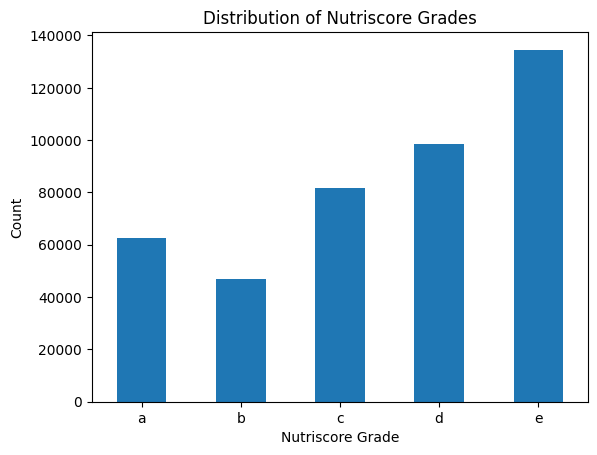

{'a': 62500, 'b': 47033, 'c': 81611, 'd': 98591, 'e': 134562}


,Count,Percentage (%)
nutriscore_grade,,
a,62500,14.7
b,47033,11.1
c,81611,19.2
d,98591,23.2
e,134562,31.7


In [15]:
# Target Variable is nutriscore_grade
# plot distribution of nutriscore grades
grade_order = ["a", "b", "c", "d", "e"]
counts = df["nutriscore_grade"].value_counts().reindex(grade_order)
counts.plot(kind="bar")
plt.xlabel("Nutriscore Grade")
plt.ylabel("Count")
plt.title("Distribution of Nutriscore Grades")
plt.xticks(rotation=0)
plt.show()
print(counts.to_dict())

# Count and percentage
counts = df["nutriscore_grade"].value_counts().reindex(grade_order)
percentages = (counts / counts.sum() * 100).round(1)

# Combine into a summary DataFrame
nutriscore_summary = pd.DataFrame({
    "Count": counts.astype(int),
    "Percentage (%)": percentages
})
display(nutriscore_summary)

Nutri-Score classes: a, b, c, d, e (ordinal scale).

- Most products fall under d (23%) and d (32%), indicating poorer nutritional quality.
- a (15%) and b (11%) represent healthier foods.
- Class imbalance exists — will address it in data preprocessing.

In [16]:
# Missing values count and percent
missing = df.isnull().sum()
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"Missing Values": missing, "Missing %": missing_percent})
display(missing_df.sort_values("Missing %", ascending=False))

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")


,Missing Values,Missing %
added_sugars,399463,94.15
labels_tags,305699,72.05
trans_fat,173995,41.01
brands,116939,27.56
ingredients_from_palm_oil_n,85832,20.23
sugars,13036,3.07
carbohydrates,4804,1.13
salt,4116,0.97
proteins,4015,0.95
fat,4002,0.94



Duplicate rows: 0


- High missingness in: added_sugars (94%), labels_tags (72%), trans_fat (41%),brands (28%), and ingredients_from_palm_oil_n(20&).
- Low missingness (<3%) in main nutrient columns including sugar, carbohydrates, salts, proteins, energy, fat, and etc.
- No duplicate rows detected.

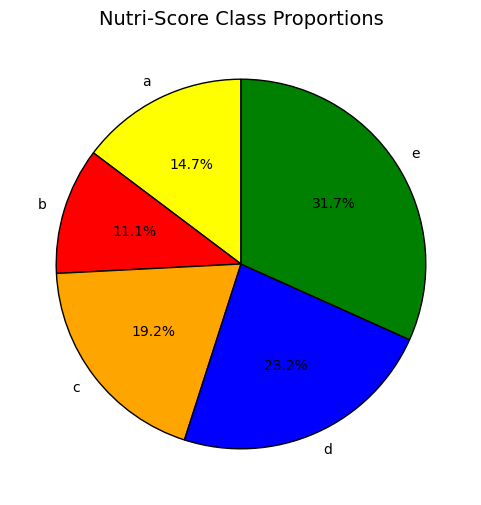

In [17]:
plt.figure(figsize=(6,6))
plt.pie(counts, labels=grade_order, autopct='%1.1f%%', startangle=90,
        colors=["yellow","red","orange","blue","green"],
        wedgeprops={'edgecolor':'black'})
plt.title("Nutri-Score Class Proportions", fontsize=14)
plt.show()


The pie chart reinforces the imbalance:
- The blue/green slices (d, e) dominate the dataset.
- Healthy classes a and b occupy smaller areas.
- This imbalance might affect model learning and should be taken into consideration.

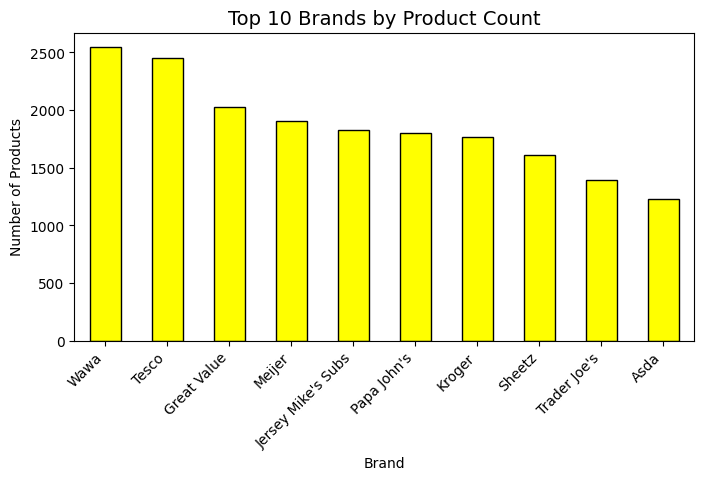

In [18]:
top_brands = df["brands"].value_counts().head(10)
plt.figure(figsize=(8,4))
top_brands.plot(kind="bar", color="yellow", edgecolor="black")
plt.title("Top 10 Brands by Product Count", fontsize=14)
plt.xlabel("Brand")
plt.ylabel("Number of Products")
plt.xticks(rotation=45, ha="right")
plt.show()

A few brands dominate the dataset.
This could bias learning toward those brands if not handled properly (e.g., randomizing or excluding brand identifiers during model training).